In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
df= pd.read_excel('droppednulls.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41365 entries, 0 to 41364
Data columns (total 60 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      41365 non-null  int64  
 1   Unnamed: 0.1    41365 non-null  int64  
 2   Unnamed: 0.1.1  41365 non-null  int64  
 3   Country         41365 non-null  object 
 4   IDSTUD          41365 non-null  int64  
 5   ASBH02A         41365 non-null  object 
 6   ASBH02B         16131 non-null  object 
 7   ASBH03A         40775 non-null  object 
 8   ASBH04          26888 non-null  float64
 9   ASBH15A         23005 non-null  float64
 10  ASBH15B         20263 non-null  float64
 11  ASBH16          39885 non-null  float64
 12  ASBH17A         14850 non-null  float64
 13  ASBH17B         12612 non-null  float64
 14  ASBH18AA        25767 non-null  float64
 15  ASBH18AB        20840 non-null  float64
 16  ASBG01          29510 non-null  float64
 17  ASBG03          28438 non-null 

In [2]:
column_list = df.columns.to_list()
# Join the list into a single string separated by ', '
# Format each column name with quotes
formatted_columns = ', '.join(f"'{col}'" for col in column_list)

# Print the formatted string
print(formatted_columns)

'Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Country', 'IDSTUD', 'ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F', 'ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J', 'ASDAGE', 'ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05', 'MINAGEARRIVAL', 'rounded_ages'


In [3]:
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

In [4]:
non_assessment_score_columns = ['Country', 'IDSTUD', 'ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03','MINAGEARRIVAL', 'rounded_ages','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F', 'ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']

In [5]:
demographic_info_columns = ['Country', 'IDSTUD', 'ASBH02A', 'ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03','MINAGEARRIVAL', 'rounded_ages']

In [17]:
experience_in_school_columns = ['ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']

In [7]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'],axis=1)

Now I want to do the above but comparing their experience in school. 

In [18]:
pivot_df_experienceinschool = df.pivot_table(values=experience_in_school_columns, index=['Country','ASBH02A'], aggfunc='mean')
pivot_df_experienceinschool

ASBG11A   ASBG11B   ASBG11C   ASBG11D   ASBG11E  \
Country     ASBH02A                                                     
Austria     No       2.726457  2.986517  2.866817  3.460137  3.269058   
            Yes      3.041048  3.184503  3.121587  3.604669  3.510338   
Egypt       No       2.896694  2.928270  3.137500  3.181435  3.170124   
            Yes      3.069665  3.038547  3.265500  3.299629  3.242747   
France      No       3.271186  3.374468  3.393162  3.512821  3.761702   
            Yes      3.376076  3.416213  3.461259  3.709567  3.752840   
Germany     No       2.947059  2.885542  3.082840  3.421687  3.430303   
            Yes      3.097504  3.055477  3.402086  3.721826  3.667313   
Jordan      No       3.380388  3.283262  3.386117  3.458735  3.489883   
            Yes      3.392230  3.331656  3.394493  3.499672  3.481239   
Netherlands No       3.000000  3.243590  3.012987  3.545455  3.551282   
            Yes      3.235884  3.219989  3.184771  3.598825  3.646432   
Sweden      No       2.929293  3.167235  3.217993  3.512195  3.262411   
            Yes      3.107102  3.390972  3.462949  3.689496  3.453879   

                      ASBG11F   ASBG11G   ASBG11H   ASBG11I   ASBG11J  
Country     ASBH02A                                                    
Austria     No       3.022422  3.357143  3.399103  3.659243  3.654709  
            Yes      3.166541  3.540146  3.624811  3.788297  3.718884  
Egypt       No       3.033613  3.175966  3.250000  3.303419  3.288136  
            Yes      3.178399  3.332795  3.361719  3.394908  3.332957  
France      No       3.282051  3.646809  3.862661  3.885106  3.719149  
            Yes      3.353102  3.691431  3.877760  3.922972  3.760055  
Germany     No       3.220930  3.497041  3.610778  3.700599  3.658683  
            Yes      3.210526  3.673095  3.764151  3.854900  3.739318  
Jordan      No       3.500536  3.595722  3.615139  3.652688  3.588110  
            Yes      3.532304  3.603264  3.632254  3.678377  3.616408  
Netherlands No       2.923077  3.346154  3.743590  3.805195  3.666667  
            Yes      3.026582  3.549072  3.669304  3.722809  3.776842  
Sweden      No       3.199324  3.614334  3.593857  3.775862  3.612457  
            Yes      3.347974  3.698328  3.723258  3.890923  3.738592

<Figure size 1080x720 with 0 Axes>

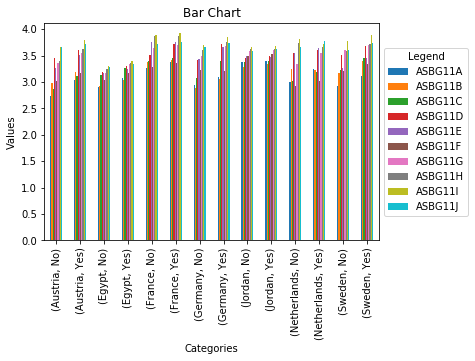

In [20]:
plt.figure(figsize=(15,10))
ax3 = pivot_df_experienceinschool.plot(kind='bar')
plt.title('Bar Chart')
plt.xlabel('Categories')
plt.ylabel('Values')
# Move the legend outside the plot
ax3.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Legend')
plt.show()

**This is too small - make it bigger**

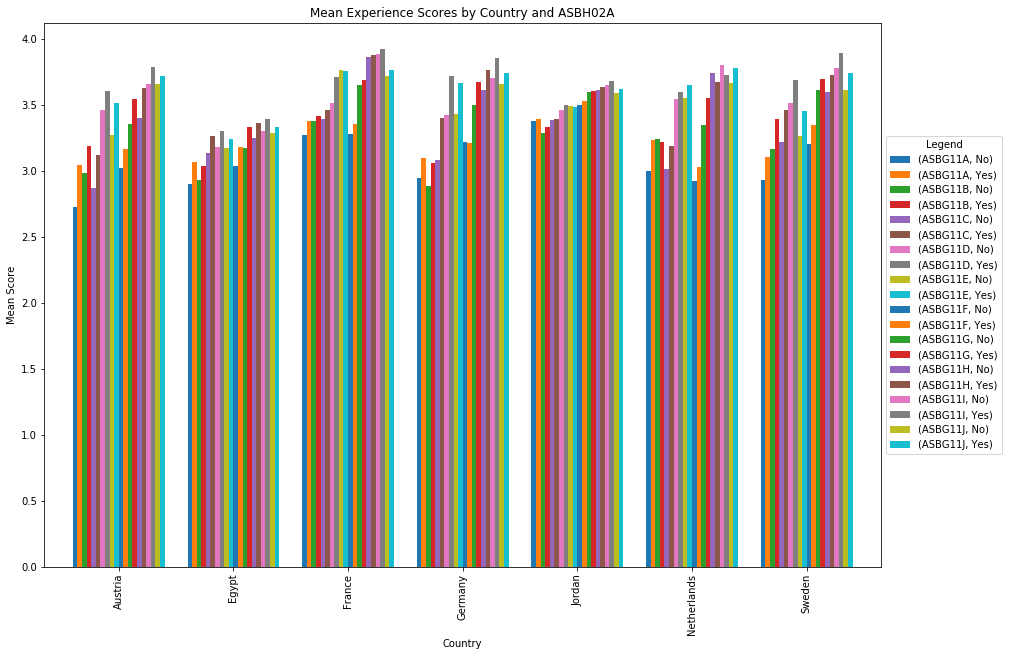

In [21]:
pivot_df_experience_unstacked = pivot_df_experienceinschool.unstack(level=1)
ax4 = pivot_df_experience_unstacked.plot(kind='bar', figsize=(15,10), width=0.8)
plt.title('Mean Experience Scores by Country and ASBH02A')
plt.xlabel('Country')
plt.ylabel('Mean Score')
plt.legend(title='ASBH02A')
# Move the legend outside the plot
ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Legend')
plt.show()

This isn't very helpful - not doing the same as before. **look into this a bit more**

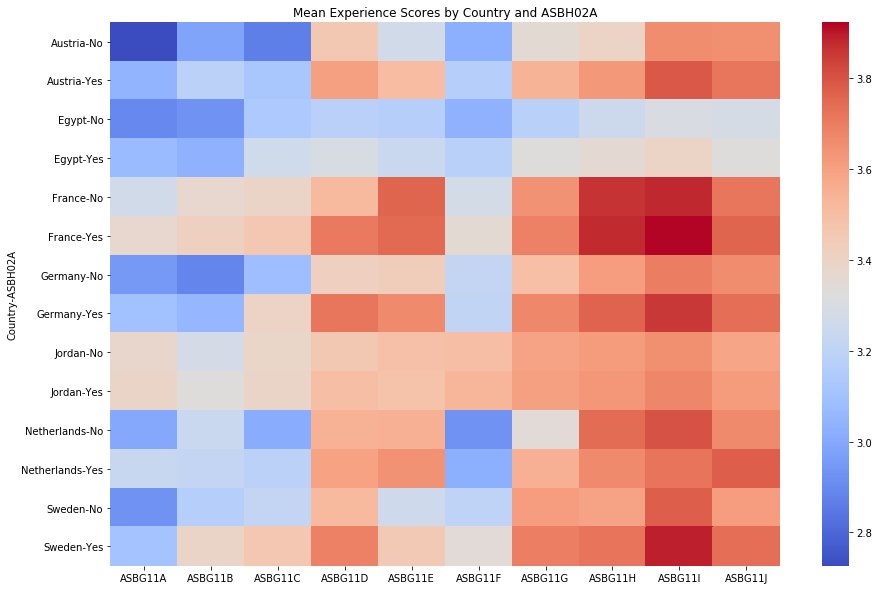

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(pivot_df_experienceinschool, annot=False, cmap='coolwarm')  # Set annot=False to remove values
plt.title('Mean Experience Scores by Country and ASBH02A')
plt.show()

Reds are good, dark blues are bad. Worst country is Egypt - bluest hues.

Now I want to sort the heatmap by values so that it is easier to see.

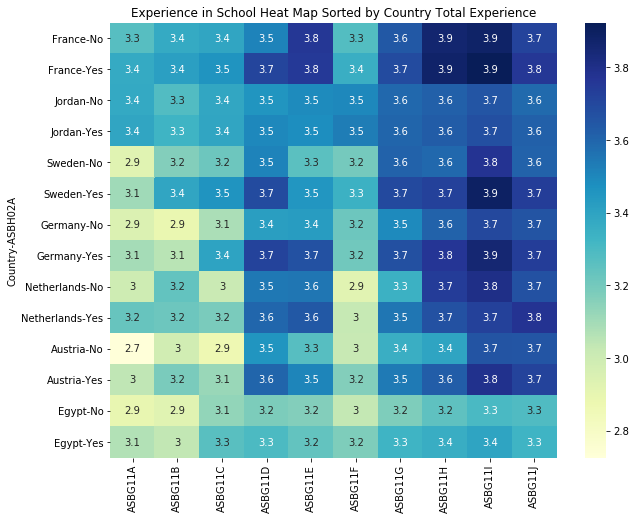

In [25]:
# Calculate totals by country
country_totals = pivot_df_experienceinschool.groupby(level='Country').sum().sum(axis=1)

# Sort countries by total values
sorted_countries = country_totals.sort_values(ascending=False).index

# Reindex the pivot table
sorted_pivot_df = pivot_df_experienceinschool.reindex(sorted_countries, level='Country')

# Drop the Total column after sorting (if needed)
sorted_pivot_df = sorted_pivot_df.drop(columns='Total')

# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_df, annot=True, cmap='YlGnBu')
plt.title('Experience in School Heat Map Sorted by Country Total Experience')
plt.show()

Okay, this is helpful. **France** does best and **Egypt** is worst.

## **CAlculating the mean, not the total**##

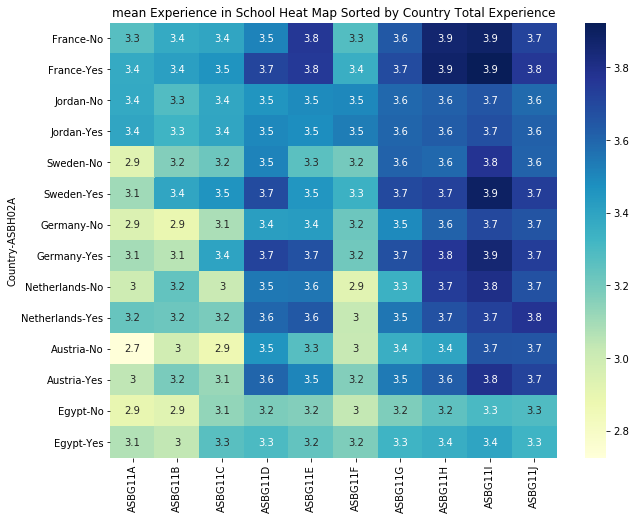

In [47]:
# Step 2: Calculate the mean score for each country
country_mean_scores = pivot_df_experienceinschool.groupby(level='Country').mean()

# If you want to sum the mean scores across all assessment columns (if there are multiple), you can do:
country_mean_scores['MeanTotal'] = country_mean_scores.mean(axis=1)

# Sort countries by total values
sorted_countries_means = country_mean_scores.sort_values(by='MeanTotal', ascending=False).index

# Reindex the pivot table
sorted_pivot_means_df = pivot_df_experienceinschool.reindex(sorted_countries_means, level='Country')

# Drop the Total column after sorting (if needed)
sorted_pivot_means_df = sorted_pivot_means_df.drop(columns='Total')

# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_means_df, annot=True, cmap='YlGnBu')
plt.title('mean Experience in School Heat Map Sorted by Country Total Experience')
plt.show()

**I want to get back all the asbg10 ones - they are useful**

YlGnBu seems to be a more intuitive colour mapping

Putting the yes on top of the nos....

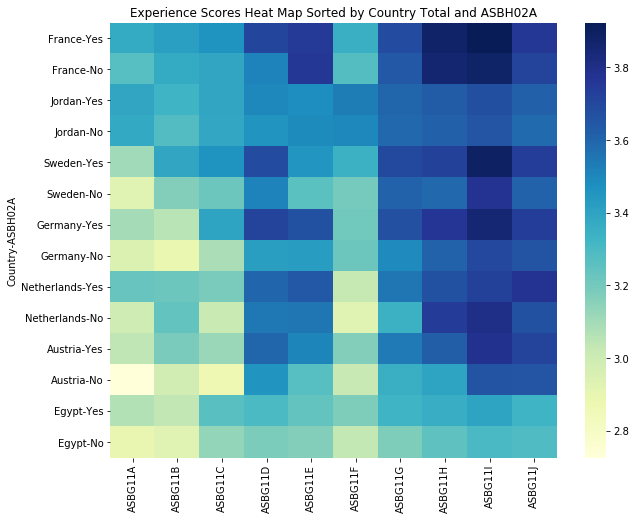

In [35]:
# Create a custom sorter for ASBH02A
asbh02a_sorter = ['Yes', 'No']

# Get the current index as a DataFrame for sorting
index_df = pivot_df_experienceinschool.index.to_frame()

# Rename the columns to avoid conflict
index_df = index_df.rename(columns={'Country': 'Country_', 'ASBH02A': 'ASBH02A_'})

# Sort the DataFrame first by Country using the sorted_countries and then by ASBH02A using the custom sorter
index_df['Country_'] = pd.Categorical(index_df['Country_'], categories=sorted_countries, ordered=True)
index_df['ASBH02A_'] = pd.Categorical(index_df['ASBH02A_'], categories=asbh02a_sorter, ordered=True)
index_df = index_df.sort_values(by=['Country_', 'ASBH02A_'])

# Reindex the pivot table using the sorted index
sorted_pivot_df = pivot_df_experienceinschool.loc[index_df.index]

# Drop the Total column after sorting (if needed)
sorted_pivot_df = sorted_pivot_df.drop(columns='Total')

# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_pivot_df, annot=False, cmap='YlGnBu')
plt.title('Experience Scores Heat Map Sorted by Country Total and ASBH02A')
plt.show()


## After changing the above to calculate mean instead of total (and seeing if there are any changes in the heatmaps) I can use the differing demographic data to see if there is that affects experience in schools and rreading scores. Should also compare reading scores with the benchmark and can also compare with previous years.

## Before I do the above though I need to check out those barcharts and understand why they are not stacking? in the way the other ones did (yes on top of no) is there a better way to do the legend etc. 

1: At least once a week; 2: Once or twice a month; 3: A few times a year; 4: Never\
ASBG11A	GEN\HOW OFTEN\MADE FUN OF\
ASBG11B	GEN\HOW OFTEN\LEFT OUT OF GAMES\
ASBG11C	GEN\HOW OFTEN\SPREADING LIES ABOUT ME\
ASBG11D	GEN\HOW OFTEN\STEALING STH FROM ME\
ASBG11E	GEN\HOW OFTEN\DAMAGED STH OF MINE\
ASBG11F	GEN\HOW OFTEN\HIT OR HURT ME\
ASBG11G	GEN\HOW OFTEN\MADE ME DO\
ASBG11H	GEN\HOW OFTEN\NASTY OF HURTFUL MESSAGES\
ASBG11I	GEN\HOW OFTEN\NASTY OF HURTFUL INFO\
ASBG11J	GEN\HOW OFTEN\THREATENED ME\